In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [2]:
path = "Cars Dataset.csv"
dataset = pd.read_csv(path, delimiter=",")
dataset = dataset.rename(columns=lambda x: x.strip()) 
dataset.head()

,Model,Year,Km/h,Color,Type,Fuel,Price
0,Hyundai Elantra HD,2009.0,"165,000",Gray,Automatic,Gasoline,"560,000"
1,Hyundai Elantra,2010.0,"194,000",Black,Automatic,Gasoline,"600,000"
2,Hyundai Elantra HD,2010.0,"205,000",Silver,Automatic,Gasoline,"575,000"
3,Hyundai Elantra,2010.0,"160,000",Black,Automatic,Gasoline,"550,000"
4,Hyundai Elantra,2009.0,"140,451",Eggplant,Automatic,Gasoline,"650,000"


In [ ]:
dataset.isna()

,Model,Year,Km/h,Color,Type,Fuel,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
952,True,True,True,True,True,True,True
953,True,True,True,True,True,True,True
954,True,True,True,True,True,True,True
955,True,True,True,True,True,True,True


In [4]:
dataset = dataset.iloc[:599]
missing_values = dataset.isnull().sum()
rows_with_missing = dataset[dataset.isnull().any(axis=1)]
print(rows_with_missing)
print(missing_values)

Empty DataFrame
Columns: [Model, Year, Km/h, Color, Type, Fuel, Price]
Index: []
Model    0
Year     0
Km/h     0
Color    0
Type     0
Fuel     0
Price    0
dtype: int64


In [5]:
print(dataset.dtypes)

Model     object
Year     float64
Km/h      object
Color     object
Type      object
Fuel      object
Price     object
dtype: object


In [6]:
dataset['Km/h'] = dataset['Km/h'].str.replace(',', '').str.replace('"', '').astype(int)
dataset['Price'] = dataset['Price'].str.replace(',', '').str.replace('"', '').astype(int)
dataset['Year'] = dataset['Year'].astype(int)
dataset.describe()

,Year,Km/h,Price
count,599.000000,599.000000,5.990000e+02
mean,2048.323873,109853.061770,1.253472e+06
std,743.895065,78372.749516,1.090366e+06
min,2008.000000,1.000000,1.500000e+05
25%,2014.000000,57000.000000,5.775000e+05
50%,2019.000000,99000.000000,8.700000e+05
75%,2022.000000,150000.000000,1.450000e+06
max,20224.000000,500000.000000,9.200000e+06


In [7]:
dataset = dataset[dataset['Year'] <= 2024]
dataset.describe()

,Year,Km/h,Price
count,586.000000,586.000000,5.860000e+02
mean,2017.784983,111310.088737,1.221937e+06
std,4.698228,78400.993194,1.054349e+06
min,2008.000000,1.000000,1.500000e+05
25%,2014.000000,59250.000000,5.750000e+05
50%,2019.000000,100000.000000,8.575000e+05
75%,2022.000000,150750.000000,1.400000e+06
max,2024.000000,500000.000000,9.200000e+06


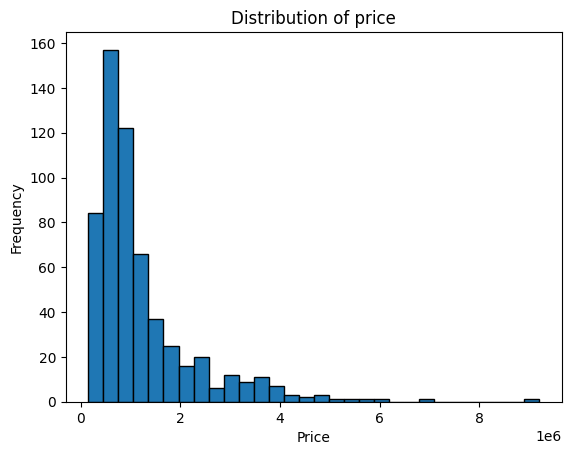

In [8]:
plt.hist(dataset['Price'], bins=30, edgecolor='black')
plt.title('Distribution of price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [17]:
unique_values_model = dataset['Model'].nunique()
unique_values_fuel = dataset['Fuel'].nunique()
unique_values_color = dataset['Color'].nunique()

print(f"Количество уникальных значений в колонке 'Model': {unique_values_model}")
print(f"Количество уникальных значений в колонке 'Fuel': {unique_values_fuel}")
print(f"Количество уникальных значений в колонке 'Color': {unique_values_color}")

Количество уникальных значений в колонке 'Model': 192
Количество уникальных значений в колонке 'Fuel': 4
Количество уникальных значений в колонке 'Color': 24


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import category_encoders as ce

dataset = dataset.drop('Color', axis=1)
dataset = pd.get_dummies(dataset, columns=['Fuel', 'Type'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Price', axis=1), dataset['Price'], test_size=0.2, random_state=42)
encoder = ce.TargetEncoder(cols=['Model'])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

print(X_train_encoded.head())
print(dataset.head())


            Model  Year    Km/h  Fuel_1  Fuel_2  Fuel_3  Type_1
131  1.349902e+06  2011  210000   False    True   False   False
153  1.433056e+06  2024    7000   False    True   False   False
77   1.129900e+06  2016  152000   False    True   False   False
444  9.660013e+05  2015  111000   False    True   False   False
256  1.075742e+06  2019   89000   False    True   False   False
   Model  Year    Km/h   Price  Fuel_1  Fuel_2  Fuel_3  Type_1
0     65  2009  165000  560000   False    True   False   False
1     62  2010  194000  600000   False    True   False   False
2     65  2010  205000  575000   False    True   False   False
3     62  2010  160000  550000   False    True   False   False
4     62  2009  140451  650000   False    True   False   False


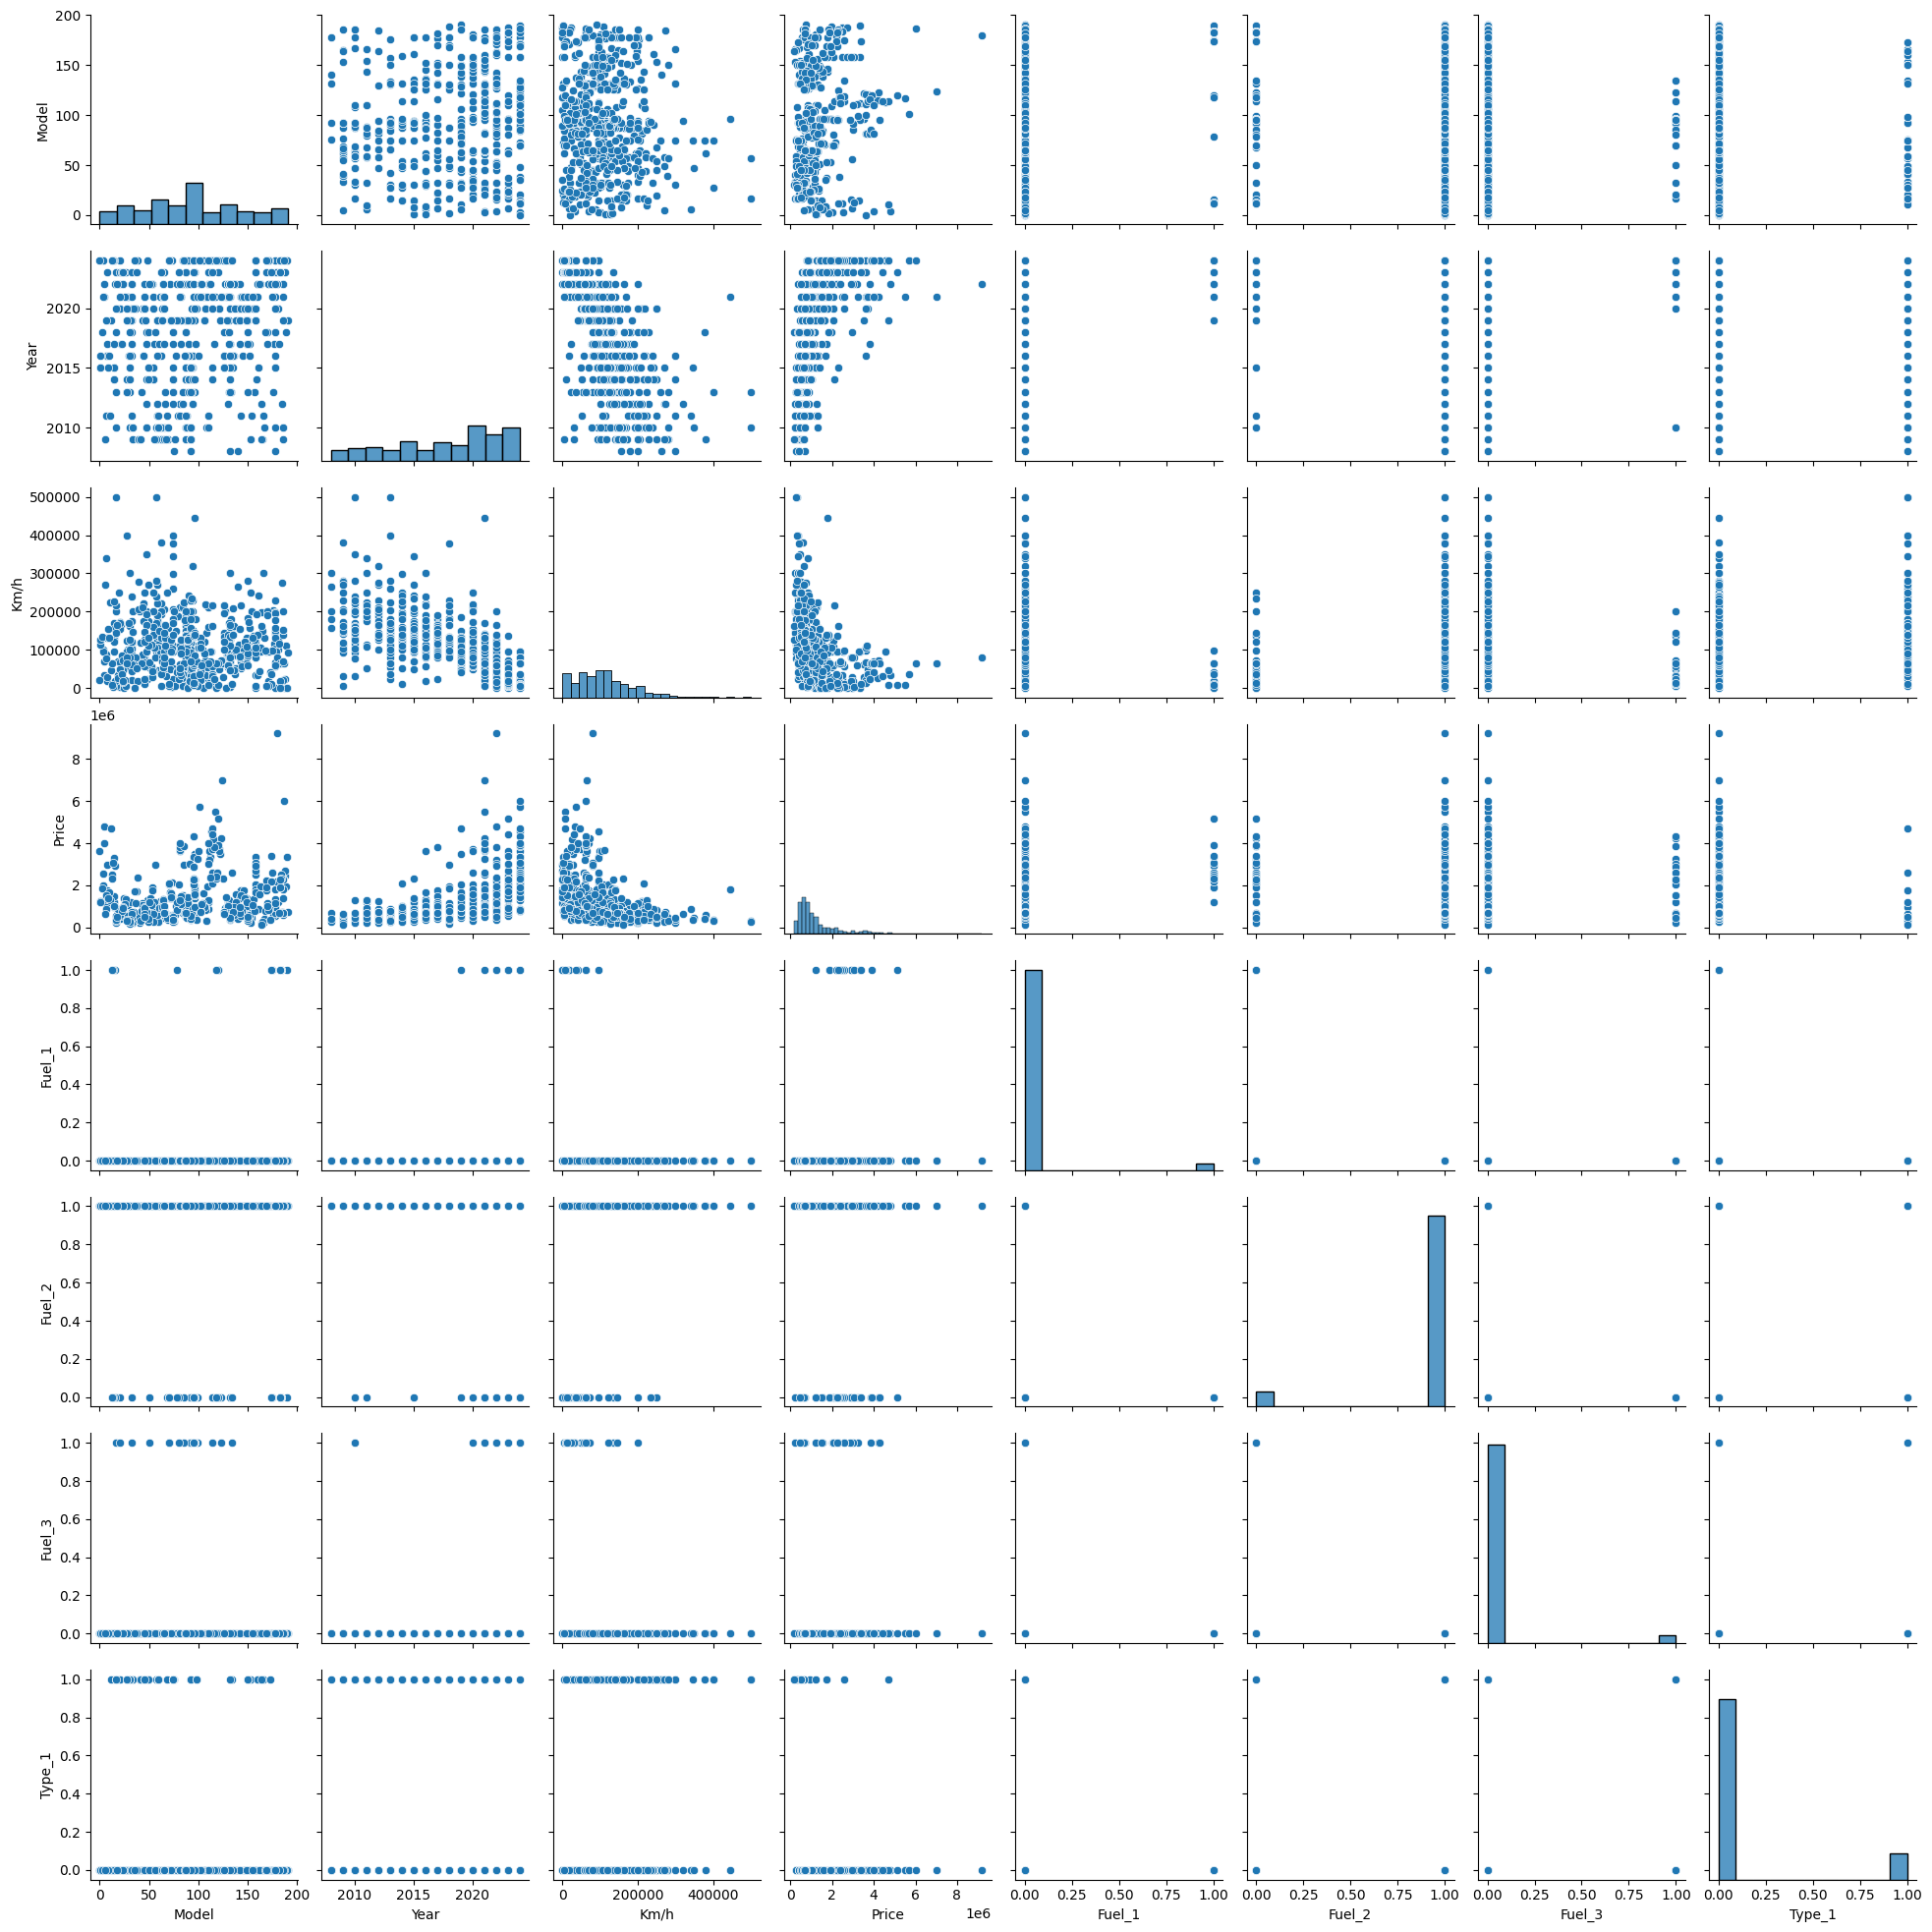

In [26]:
sns.pairplot(dataset)

In [28]:
correlation_matrix = dataset.corr()

Price     1.000000
Year      0.533604
Fuel_1    0.250851
Model     0.185187
Fuel_3    0.180838
Type_1   -0.265227
Fuel_2   -0.286804
Km/h     -0.433582
Name: Price, dtype: float64


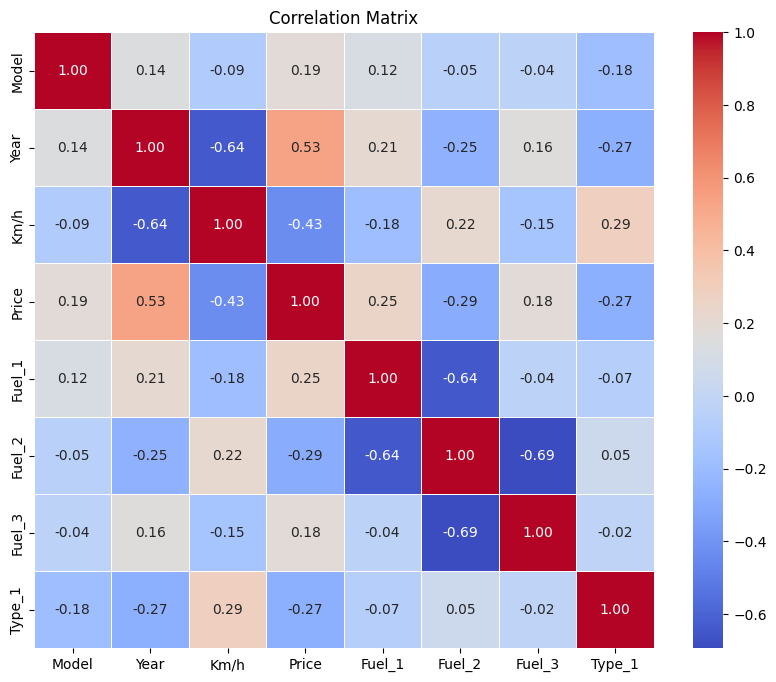

In [34]:
print(correlation_matrix['Price'].sort_values(ascending=False))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<Axes: title={'center': 'Correlation with price'}>

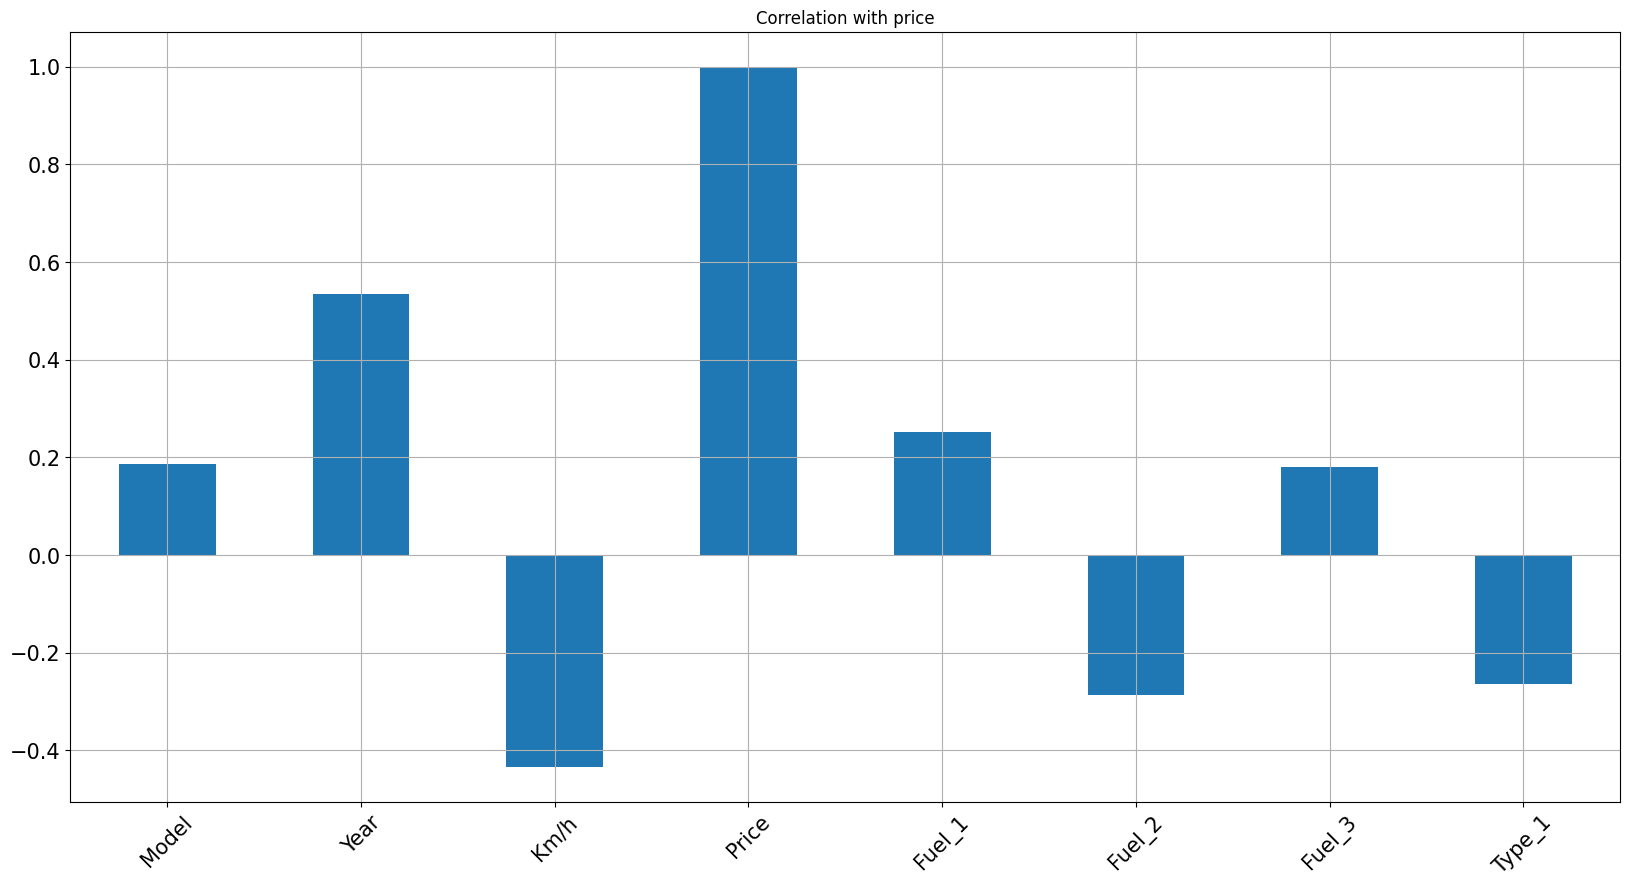

In [30]:
dataset.corrwith(dataset.Price).plot.bar(
        figsize = (20, 10), title = "Correlation with price", fontsize = 15,
        rot = 45, grid = True)

In [32]:
from sklearn.ensemble import RandomForestRegressor
X = dataset.drop('Price', axis=1)
y = dataset['Price']
features_label = dataset.columns[:7]
classifier = RandomForestRegressor(n_estimators=200, criterion='squared_error', random_state=0)
classifier.fit(X, y)
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))


 1) Model                          0.419691
 2) Year                           0.359031
 3) Km/h                           0.174337
 4) Price                          0.019400
 5) Fuel_1                         0.014161
 6) Fuel_2                         0.007386
 7) Fuel_3                         0.005995


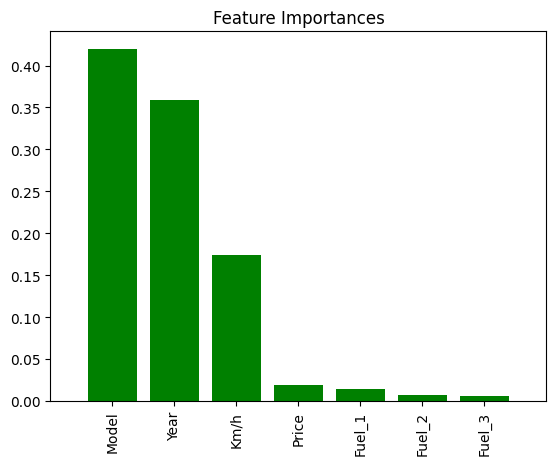

In [33]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Price', 'Km/h', 'Year']

scaler = StandardScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

print(dataset.head())


   Model      Year      Km/h     Price  Fuel_1  Fuel_2  Fuel_3  Type_1
0     65 -1.871448  0.685397 -0.628352   False    True   False   False
1     62 -1.658420  1.055606 -0.590381   False    True   False   False
2     65 -1.658420  1.196030 -0.614113   False    True   False   False
3     62 -1.658420  0.621567 -0.637845   False    True   False   False
4     62 -1.871448  0.372008 -0.542918   False    True   False   False


In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Price', axis=1), dataset['Price'], test_size=0.2, random_state=42)
results = []

In [40]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)
results.append(['Linear Regression', mse_lr, r2_lr])

In [41]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)
results.append(['Random Forest', mse_rf, r2_rf])

In [42]:
model_svr = SVR()
model_svr.fit(X_train, y_train)
predictions_svr = model_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, predictions_svr)
r2_svr = r2_score(y_test, predictions_svr)
results.append(['Support Vector Regression', mse_svr, r2_svr])

In [43]:
model_mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model_mlp.fit(X_train, y_train)
predictions_mlp = model_mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, predictions_mlp)
r2_mlp = r2_score(y_test, predictions_mlp)
results.append(['MLP Regressor', mse_mlp, r2_mlp])

In [ ]:
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)
predictions_gb = model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, predictions_gb)
r2_gb = r2_score(y_test, predictions_gb)
results.append(['Gradient Boosting', mse_gb, r2_gb])

                       Model       MSE        R²
0          Linear Regression  0.757969  0.333145
1              Random Forest  0.431928  0.619994
2  Support Vector Regression  1.077914  0.051661
3              MLP Regressor  0.754764  0.335965
4          Gradient Boosting  0.410478  0.638865
5          Gradient Boosting  0.410478  0.638865


In [51]:
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)
predictions_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, predictions_xgb)
r2_xgb = r2_score(y_test, predictions_xgb)
results.append(['XGBoost', mse_xgb, r2_xgb])

In [52]:
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R²'])
print(results_df)

                       Model       MSE        R²
0          Linear Regression  0.757969  0.333145
1              Random Forest  0.431928  0.619994
2  Support Vector Regression  1.077914  0.051661
3              MLP Regressor  0.754764  0.335965
4          Gradient Boosting  0.410478  0.638865
5          Gradient Boosting  0.410478  0.638865
6                    XGBoost  0.435844  0.616548


In [55]:
param_grid = {
    'n_estimators': [100, 200, 300],         
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'max_depth': [3, 4, 5, 6],               
    'subsample': [0.7, 0.8, 0.9, 1.0],        
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0], 
    'tree_method': ['gpu_hist']              
}

model = xgb.XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, predictions)
r2_best = r2_score(y_test, predictions)

print(f"MSE: {mse_best}")
print(f"R²: {r2_best}")


Fitting 5 folds for each of 768 candidates, totalling 3840 fits


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [23:46:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Лучшие параметры: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9, 'tree_method': 'gpu_hist'}
MSE: 0.4232161555283355
R²: 0.6276580630739845


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [23:46:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [23:46:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performan

In [56]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  
    'max_depth': np.arange(3, 15),  
    'min_samples_split': np.arange(2, 20), 
    'min_samples_leaf': np.arange(1, 20),  
    'subsample': [0.7, 0.8, 0.9, 1.0],  
    'max_features': ['auto', 'sqrt', 'log2', None]  
}

gb = GradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, 
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)

random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")

y_pred = random_search.best_estimator_.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packa

Best Parameters: {'subsample': 1.0, 'n_estimators': 900, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.3}
MSE: 0.32580554320663224
R²: 0.7133590827426058


In [57]:
best_params = {
    'subsample': 1.0,
    'n_estimators': 900,
    'min_samples_split': 7,
    'min_samples_leaf': 4,
    'max_features': None,
    'max_depth': 3,
    'learning_rate': 0.3
}

gb_optimized = GradientBoostingRegressor(**best_params, random_state=42)

gb_optimized.fit(X_train, y_train)

y_pred_optimized = gb_optimized.predict(X_test)

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"MSE: {mse_optimized}")
print(f"R²: {r2_optimized}")


MSE: 0.32580554320663224
R²: 0.7133590827426058


In [58]:
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

print(f"MSE: {mse_optimized}")
print(f"R²: {r2_optimized}")
print(f"MAE: {mae_optimized}")


NameError: name 'mean_absolute_error' is not defined

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_optimized)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Real Values')
plt.show()

residuals = y_test - y_pred_optimized

plt.figure(figsize=(8,6))
plt.scatter(y_pred_optimized, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()